In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
import scipy.stats

In [2]:
#read data with pandas library
d = pd.read_excel (r'dataset.xlsx')
df = d.iloc[:50]
df.head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


Distribution of CDR metric:
Distribution of TD metric:
Distribution of CLOC metric:


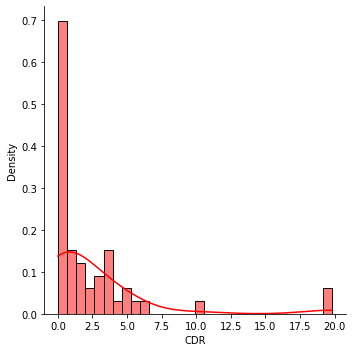

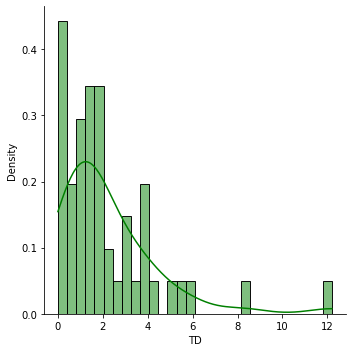

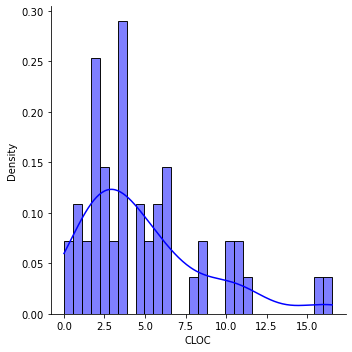

In [3]:
#distribution
def plotHist(columnName,colorName):
    print("Distribution of {} metric:".format(columnName))
    sns.displot(data=df[columnName], kde=True, color =colorName, stat ="density",bins = 30)
    
    
plotHist("CDR","red")
plotHist("TD","green")
plotHist("CLOC","blue")

In [4]:
#Min max scaler for all data
# corrDf wıll be min-max normalizated data with dimension [samples, features]
X = df.drop("Name",axis = 1)
scaler = MinMaxScaler()
scaler.fit(X)
X_normal = scaler.transform(X)
#minimum value
X_normal.min(axis=0)
#maximum value
X_normal.max(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
#Show the correlation matrix of all metrics

corrDf = pd.DataFrame(X_normal,columns=list(df.columns[1:]))
corrMatrix = corrDf.corr(method='spearman')
corrMatrix

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [6]:
#P values of Spearman Correlation Table
correlation , p = scipy.stats.spearmanr(corrMatrix, axis=0,nan_policy='propagate')
P = pd.DataFrame(p,columns = list(df.columns[1:]),index = list(df.columns[1:]) )
P

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.000000,0.000027,0.000007,0.000006,0.001093,0.761733,0.012860,0.011788,0.034952,0.278984,0.008578,0.226045,0.696334,0.571745,0.187834,0.398983
V,0.000027,0.000000,0.000063,0.000063,0.029336,0.811821,0.008988,0.003204,0.164868,0.556861,0.082537,0.195933,0.594378,0.444285,0.411666,0.338790
SH,0.000007,0.000063,0.000000,0.000011,0.005511,0.254067,0.000079,0.004712,0.024437,0.931074,0.069744,0.648542,0.556861,0.321804,0.737005,0.069744
CS,0.000006,0.000063,0.000011,0.000000,0.000079,0.672291,0.017933,0.013424,0.113034,0.127806,0.110229,0.172304,0.464464,0.380356,0.140544,0.424559
CDR,0.001093,0.029336,0.005511,0.000079,0.000000,0.431083,0.338790,0.249254,0.431083,0.015876,0.321804,0.321804,0.268847,0.094421,0.107474,0.696334
TD,0.761733,0.811821,0.254067,0.672291,0.431083,0.000000,0.031493,0.284139,0.038691,0.431083,0.321804,0.778341,0.022663,0.478164,0.737005,0.032616
NOC,0.012860,0.008988,0.000079,0.017933,0.338790,0.031493,0.000000,0.000286,0.003204,0.249254,0.015232,0.704410,0.067761,0.939674,0.811821,0.004233
CBO,0.011788,0.003204,0.004712,0.013424,0.249254,0.284139,0.000286,0.000000,0.010314,0.770025,0.004712,0.041346,0.931074,0.640694,0.208500,0.044135
RFC,0.034952,0.164868,0.024437,0.113034,0.431083,0.038691,0.003204,0.010314,0.000000,0.478164,0.017225,0.737005,0.130913,0.176104,0.656425,0.520408
LOC,0.278984,0.556861,0.931074,0.127806,0.015876,0.431083,0.249254,0.770025,0.478164,0.000000,0.854100,0.003588,0.000007,0.820242,0.000011,0.176104


<AxesSubplot:>

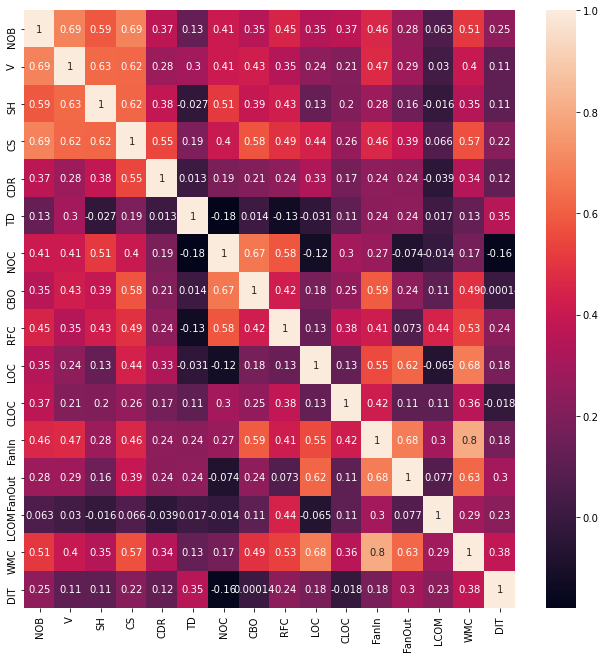

In [7]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.subplots(figsize=(11,11))
sns.heatmap(corrMatrix, annot=True)

In [8]:
TD_metrics = pd.concat([corrDf["TD"],corrDf["CDR"]],axis = 1)

extenal_metrics = pd.concat([corrDf["NOB"],corrDf["SH"],corrDf["V"],corrDf["CS"]],axis = 1)

internal_metrics = pd.concat([corrDf["NOC"],corrDf["CBO"],corrDf["LCOM"],corrDf["FanIn"],corrDf["FanOut"],
                              corrDf["RFC"],corrDf["DIT"],corrDf["WMC"],corrDf["LOC"],corrDf["CLOC"]],axis = 1)

In [9]:
#Correlation between External Metrics & TD
TD_External = pd.concat([TD_metrics,extenal_metrics],axis=1)
corr_TD_Ex = TD_External.corr(method='spearman')
corr_TD_Ex


,TD,CDR,NOB,SH,V,CS
TD,1.000000,0.013400,0.133383,-0.026546,0.296757,0.194611
CDR,0.013400,1.000000,0.373251,0.384657,0.280358,0.548113
NOB,0.133383,0.373251,1.000000,0.587592,0.694733,0.691274
SH,-0.026546,0.384657,0.587592,1.000000,0.629663,0.618509
V,0.296757,0.280358,0.694733,0.629663,1.000000,0.624194
CS,0.194611,0.548113,0.691274,0.618509,0.624194,1.000000


In [10]:
#Correlation between Internal Metrics & TD
TD_Internal = pd.concat([TD_metrics,internal_metrics],axis=1)
corr_TD_In  = TD_Internal.corr(method="spearman")
corr_TD_In

,TD,CDR,NOC,CBO,LCOM,FanIn,FanOut,RFC,DIT,WMC,LOC,CLOC
TD,1.000000,0.013400,-0.179659,0.013652,0.017159,0.239077,0.240135,-0.126364,0.352010,0.127638,-0.031098,0.114297
CDR,0.013400,1.000000,0.192707,0.212007,-0.038683,0.243709,0.237237,0.240992,0.123330,0.343628,0.328527,0.171773
NOC,-0.179659,0.192707,1.000000,0.667344,-0.013518,0.268289,-0.074350,0.584086,-0.163788,0.173468,-0.120165,0.297347
CBO,0.013652,0.212007,0.667344,1.000000,0.109694,0.594578,0.240953,0.421247,0.000144,0.492616,0.177024,0.250408
LCOM,0.017159,-0.038683,-0.013518,0.109694,1.000000,0.296355,0.076982,0.444076,0.229251,0.291312,-0.065455,0.107619
FanIn,0.239077,0.243709,0.268289,0.594578,0.296355,1.000000,0.679297,0.414878,0.179395,0.802910,0.554326,0.416789
FanOut,0.240135,0.237237,-0.074350,0.240953,0.076982,0.679297,1.000000,0.072564,0.295389,0.626327,0.618676,0.109636
RFC,-0.126364,0.240992,0.584086,0.421247,0.444076,0.414878,0.072564,1.000000,0.237368,0.529367,0.134608,0.381636
DIT,0.352010,0.123330,-0.163788,0.000144,0.229251,0.179395,0.295389,0.237368,1.000000,0.381028,0.181072,-0.017867
WMC,0.127638,0.343628,0.173468,0.492616,0.291312,0.802910,0.626327,0.529367,0.381028,1.000000,0.678224,0.355080


# part2

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [12]:
def plotGraph(y_test,y_pred,regressorName):
    x = np.arange(len(y_test))
    plt.title(regressorName)
    plt.scatter(x,y_test,label = "test")
    plt.scatter(x,y_pred,label = "prediction")
    plt.legend()

In [13]:
def linearRegression(X_train,y_train,X_test,y_test):
    regression_model = LinearRegression()
    regression_model.fit(X_train,y_train)
    y_predicted = regression_model.predict(X_test)
    
    # model evaluation
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    plotGraph(y_test,y_predicted,"Linear Regressor")

In [14]:
def svrRegression(X_train,y_train,X_test,y_test):
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train,y_train)
    
    y_predicted = regressor.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    plotGraph(y_test,y_predicted,"SVR REGRESSION")
    
    

In [15]:
def decisionTreeRegression(X_train,y_train,X_test,y_test):
    regressor = DecisionTreeRegressor(random_state=53)
    
    regressor.fit(X_train,y_train)
    
    y_predicted = regressor.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    plotGraph(y_test,y_predicted,"DECISION TREE REGRESSION")
    

In [16]:
def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    regressor = RandomForestRegressor(n_estimators=10, random_state=53)
    regressor.fit(X_train,y_train)
    
    y_predicted = regressor.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    plotGraph(y_test,y_predicted,"RANDOM TREE REGRESSION")
    

In [17]:
def mlpRegressor(X_train,y_train,X_test,y_test):
    mlpregressor = MLPRegressor(random_state=43, max_iter=400)
    mlpregressor.fit(X_train,y_train)
    
    y_predicted = mlpregressor.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    plotGraph(y_test,y_predicted,"MLP REGRESSOR")

#  estimate TD using internal metrics .

Root mean squared error:  0.07025896527425134
R2 score:  -0.172967530469208


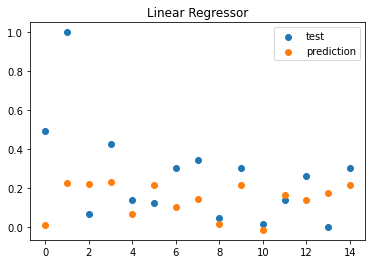

In [18]:

X = internal_metrics
y = corrDf["TD"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)



Root mean squared error:  0.0644859003136405
R2 score:  -0.07658669531666273


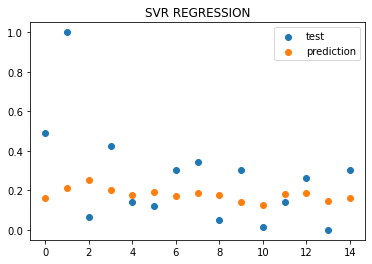

In [19]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.09022216250111978
R2 score:  -0.5062514332432677


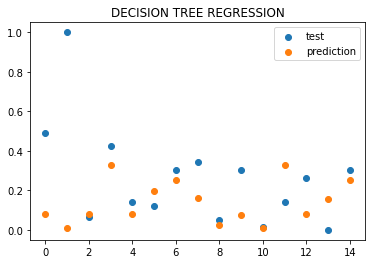

In [20]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)


Root mean squared error:  0.06263199856669356
R2 score:  -0.045635961195250374


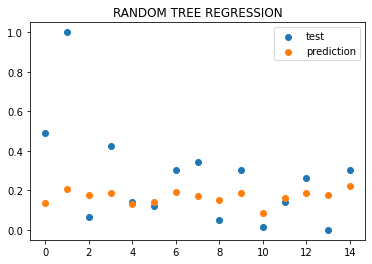

In [21]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.0766480253363944
R2 score:  -0.2796323521593427


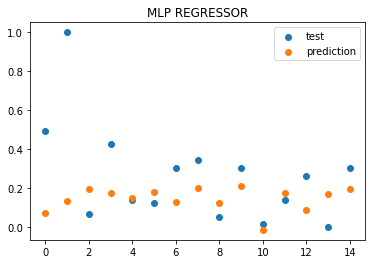

In [22]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)

# Estimate CDR Usıng Internal Metrics

Root mean squared error:  0.07968314726987584
R2 score:  -0.25353936900603125


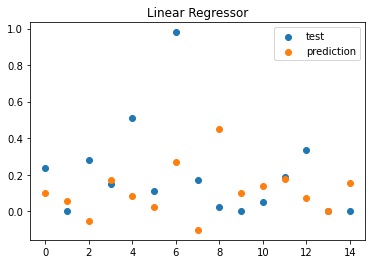

In [23]:
X = internal_metrics
y = corrDf["CDR"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07402681001404919
R2 score:  -0.16455641994479642


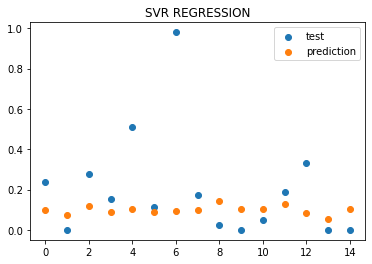

In [24]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.0654065911641669
R2 score:  -0.02894702111950087


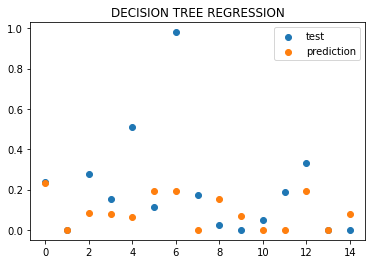

In [25]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07058958269564329
R2 score:  -0.11048350852662847


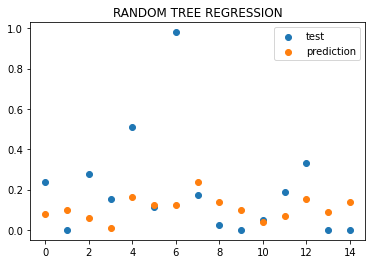

In [26]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07245497429721202
R2 score:  -0.1398290086894165


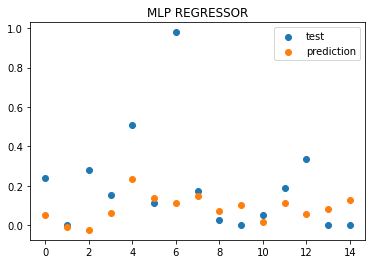

In [27]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)

# Estimate TD Using External Metrics.

Root mean squared error:  0.0858442680937875
R2 score:  -0.4331628534217624


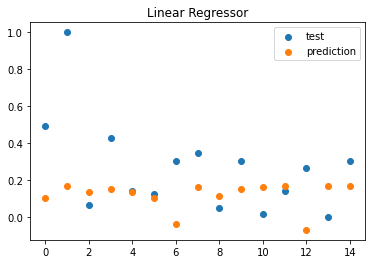

In [28]:
X = extenal_metrics
y = corrDf["TD"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.08702143250439486
R2 score:  -0.45281551449179913


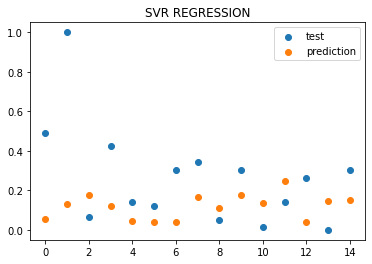

In [29]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.10405356982889905
R2 score:  -0.7371656181142008


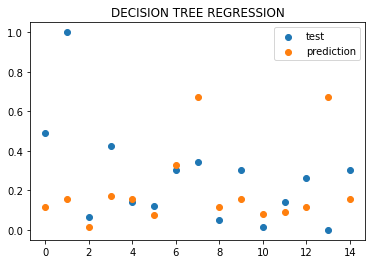

In [30]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06724890262474245
R2 score:  -0.12271478708236527


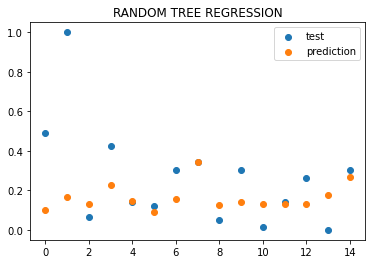

In [31]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07838424465025409
R2 score:  -0.30861838793401564


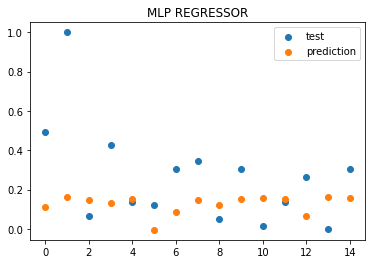

In [32]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)

# Estimate CDR Usıng External Metrics

Root mean squared error:  0.08255856081831493
R2 score:  -0.29877407933861844


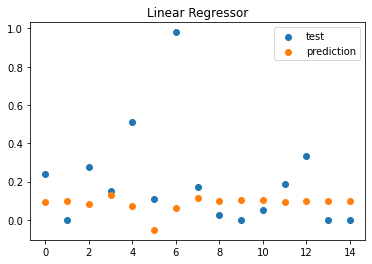

In [33]:
X = extenal_metrics
y = corrDf["CDR"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06721652007794124
R2 score:  -0.05742000726843233


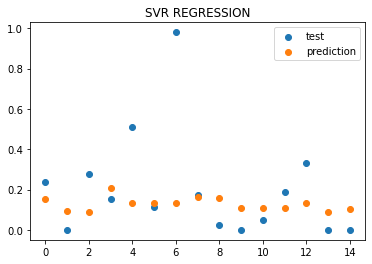

In [34]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.09524028160391797
R2 score:  -0.49827719657436775


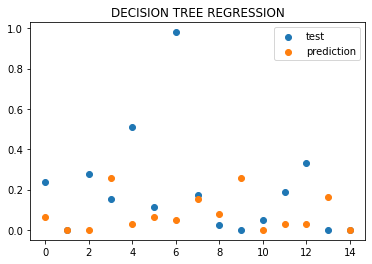

In [35]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.08563472366765294
R2 score:  -0.34716688721879585


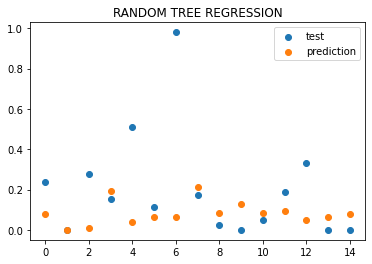

In [36]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07965703073286286
R2 score:  -0.25312851541340153


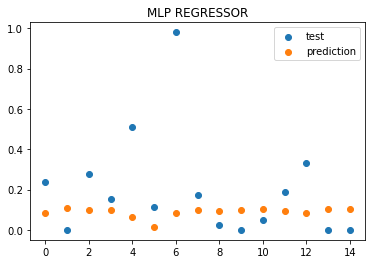

In [37]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)

# estimate TD using all internal and external metrics

Root mean squared error:  0.06011610200000146
R2 score:  -0.003633279100097031


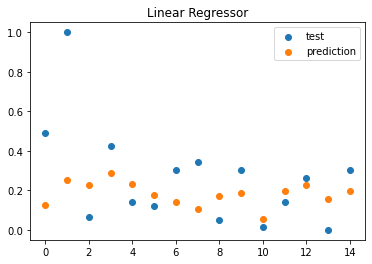

In [38]:
X = pd.concat([extenal_metrics,internal_metrics],axis=1)
y = corrDf["TD"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06572115786395459
R2 score:  -0.09720921648004177


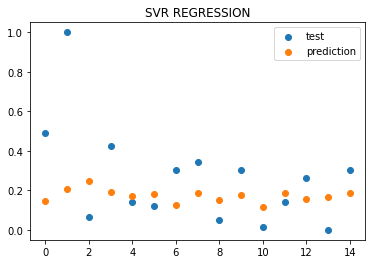

In [39]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07618919645256653
R2 score:  -0.27197224243995355


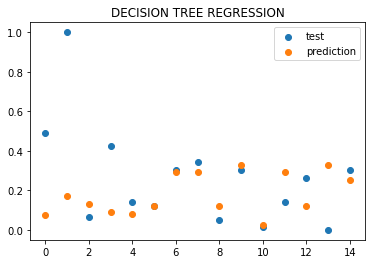

In [40]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06018014870554511
R2 score:  -0.004702533475577697


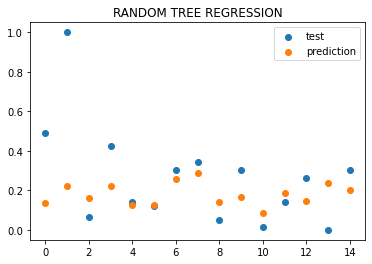

In [41]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07580718694171787
R2 score:  -0.26559462570724435


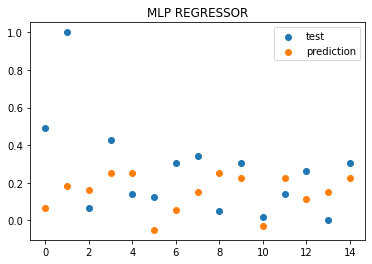

In [42]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)

# estimate CDR using all internal and external metrics

Root mean squared error:  0.1912806877100785
R2 score:  -2.009141591295797


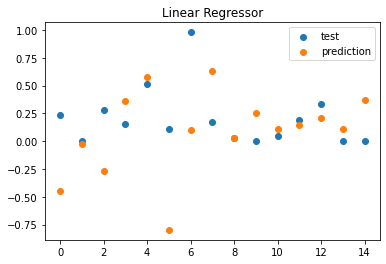

In [43]:
X = pd.concat([extenal_metrics,internal_metrics],axis=1)
y = corrDf["CDR"]
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.07878811977037575
R2 score:  -0.23945919966775842


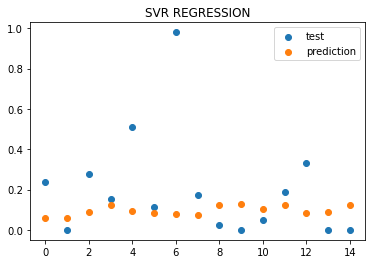

In [44]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06694895078733461
R2 score:  -0.053210727750689024


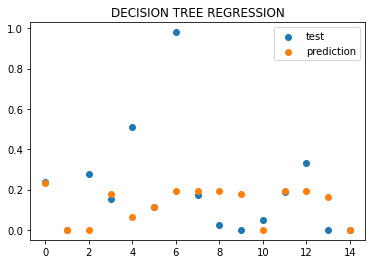

In [45]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.06848928680746862
R2 score:  -0.07744259997075131


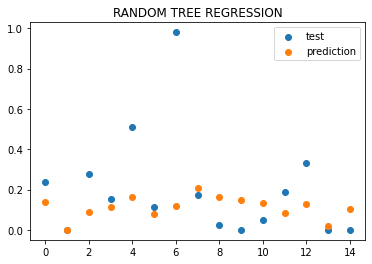

In [46]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X_train,y_train,X_test,y_test)

Root mean squared error:  0.09624669341632101
R2 score:  -0.5141096137353909


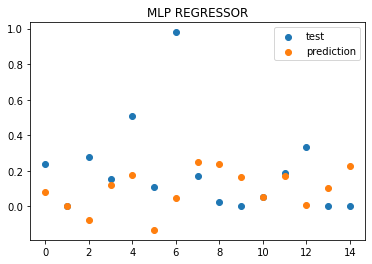

In [47]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X_train,y_train,X_test,y_test)